# Compare effect size of eQTLs


In [1]:
options(jupyter.plot_mimetypes = 'image/png')

### Imports

In [2]:
library(ggplot2)
library(extrafont)
library(scales)
library(reshape2)
library(forcats)
library(ggrepel)
library(patchwork)
library(cowplot)
library(viridis)
library(ggsignif)
library(readr)

Registering fonts with R


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal



Attaching package: ‘readr’


The following object is masked from ‘package:scales’:

    col_factor




In [3]:
source("https://gist.githubusercontent.com/benmarwick/2a1bb0133ff568cbe28d/raw/fb53bd97121f7f9ce947837ef1a4c65a73bffb3f/geom_flat_violin.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
theme_Publication <- function(base_size=14, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               legend.spacing = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

## Analysis

### Ohnologs

#### All eQTLs

In [5]:
effectSizeAllOhnologs <- read_csv("../../outputFiles/eQTLEffectSize/effectSizeAllOhnologs.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  type = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [6]:
summary(effectSizeAllOhnologs)

 Ensembl Gene ID        type            variant_id            slope         
 Length:13943190    Length:13943190    Length:13943190    Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.38035  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.16124  
                                                          Mean   : 0.03846  
                                                          3rd Qu.: 0.42768  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:13943190    Min.   : 0.05867  
 Class :character   1st Qu.: 0.27559  
 Mode  :character   Median : 0.40282  
                    Mean   : 0.46737  
                    3rd Qu.: 0.59227  
                    Max.   :12.22750  

In [7]:
effectSizeAllOhnologs$type2 <- factor(effectSizeAllOhnologs$type, levels = c('ohno', 'SSD', 'singleton'))

In [8]:
summary(effectSizeAllOhnologs)

 Ensembl Gene ID        type            variant_id            slope         
 Length:13943190    Length:13943190    Length:13943190    Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.38035  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.16124  
                                                          Mean   : 0.03846  
                                                          3rd Qu.: 0.42768  
                                                          Max.   :12.22750  
    tissue            effectSize             type2        
 Length:13943190    Min.   : 0.05867   ohno     :3372543  
 Class :character   1st Qu.: 0.27559   SSD      :5704389  
 Mode  :character   Median : 0.40282   singleton:4866258  
                    Mean   : 0.46737                      
                    3rd Qu.: 0.59227                      
                    Max.   :12.22750                      

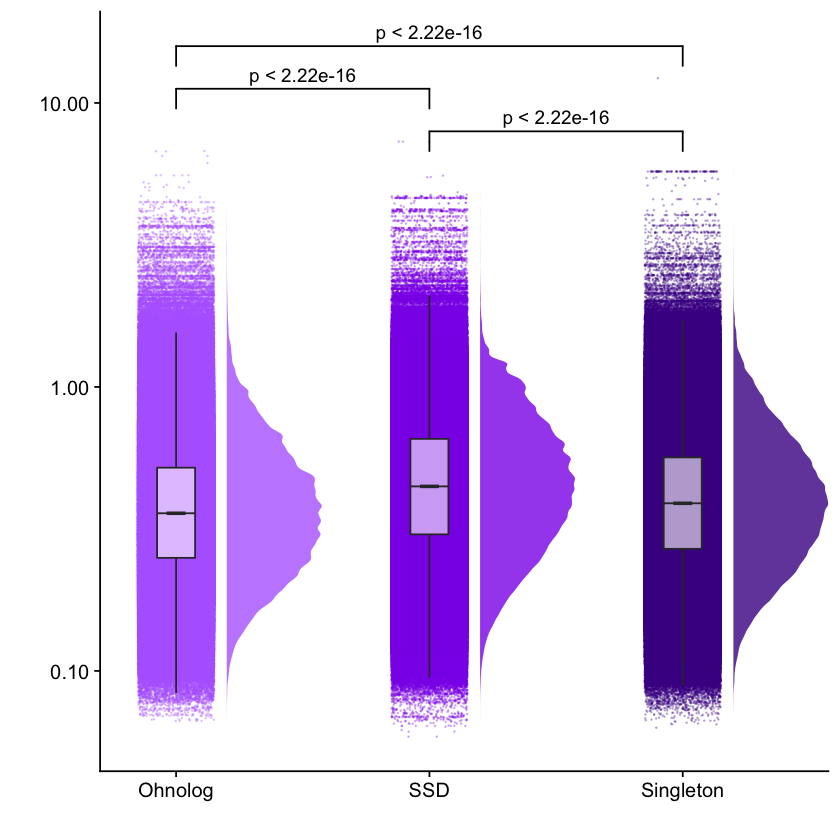

In [9]:
ohno_raincloud_all <- ggplot(effectSizeAllOhnologs, aes(type2, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = type2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = type2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="none") +
    geom_signif(y_position=c(1.2, 1.05, 0.9), comparisons = list(c("ohno", "singleton"), c("ohno", "SSD"), c("SSD", "singleton")),
               textsize=4, test = "wilcox.test")
ohno_raincloud_all

##### Test difference in effect sizes

Ohnos vs SSDs

In [10]:
w <- wilcox.test(effectSizeAllOhnologs[ which(effectSizeAllOhnologs$type == 'ohno'),]$effectSize,
                effectSizeAllOhnologs[ which(effectSizeAllOhnologs$type == 'SSD'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeAllOhnologs[which(effectSizeAllOhnologs$type == "ohno"), ]$effectSize and effectSizeAllOhnologs[which(effectSizeAllOhnologs$type == "SSD"), ]$effectSize
W = 7.5712e+12, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [11]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

Ohnos vs Singletons

In [12]:
w <- wilcox.test(effectSizeAllOhnologs[ which(effectSizeAllOhnologs$type == 'ohno'),]$effectSize,
                effectSizeAllOhnologs[ which(effectSizeAllOhnologs$type == 'singleton'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeAllOhnologs[which(effectSizeAllOhnologs$type == "ohno"), ]$effectSize and effectSizeAllOhnologs[which(effectSizeAllOhnologs$type == "singleton"), ]$effectSize
W = 7.5474e+12, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [13]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

SSDs vs Singletons

In [14]:
w <- wilcox.test(effectSizeAllOhnologs[ which(effectSizeAllOhnologs$type == 'SSD'),]$effectSize,
                effectSizeAllOhnologs[ which(effectSizeAllOhnologs$type == 'singleton'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeAllOhnologs[which(effectSizeAllOhnologs$type == "SSD"), ]$effectSize and effectSizeAllOhnologs[which(effectSizeAllOhnologs$type == "singleton"), ]$effectSize
W = 1.5764e+13, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [15]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [16]:
tapply(effectSizeAllOhnologs$effectSize, effectSizeAllOhnologs$type2, summary)

$ohno
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06659 0.25013 0.35904 0.41906 0.51966 6.77595 

$SSD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05867 0.30263 0.44646 0.51121 0.65628 7.31012 

$singleton
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0631  0.2691  0.3893  0.4495  0.5647 12.2275 


#### Most significant eQTLs

In [17]:
effectSizeMostSignificantOhnologs <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeMostSignificantOhnologs.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  type = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [18]:
summary(effectSizeMostSignificantOhnologs)

 Ensembl Gene ID        type            variant_id            slope         
 Length:146224      Length:146224      Length:146224      Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.42016  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.14641  
                                                          Mean   : 0.03973  
                                                          3rd Qu.: 0.46088  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:146224      Min.   : 0.06841  
 Class :character   1st Qu.: 0.29207  
 Mode  :character   Median : 0.43981  
                    Mean   : 0.53641  
                    3rd Qu.: 0.66621  
                    Max.   :12.22750  

In [19]:
effectSizeMostSignificantOhnologs$type2 <- factor(effectSizeMostSignificantOhnologs$type, levels = c('ohno', 'SSD', 'singleton'))

In [20]:
summary(effectSizeMostSignificantOhnologs)

 Ensembl Gene ID        type            variant_id            slope         
 Length:146224      Length:146224      Length:146224      Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.42016  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.14641  
                                                          Mean   : 0.03973  
                                                          3rd Qu.: 0.46088  
                                                          Max.   :12.22750  
    tissue            effectSize             type2      
 Length:146224      Min.   : 0.06841   ohno     :43754  
 Class :character   1st Qu.: 0.29207   SSD      :53283  
 Mode  :character   Median : 0.43981   singleton:49187  
                    Mean   : 0.53641                    
                    3rd Qu.: 0.66621                    
                    Max.   :12.22750                    

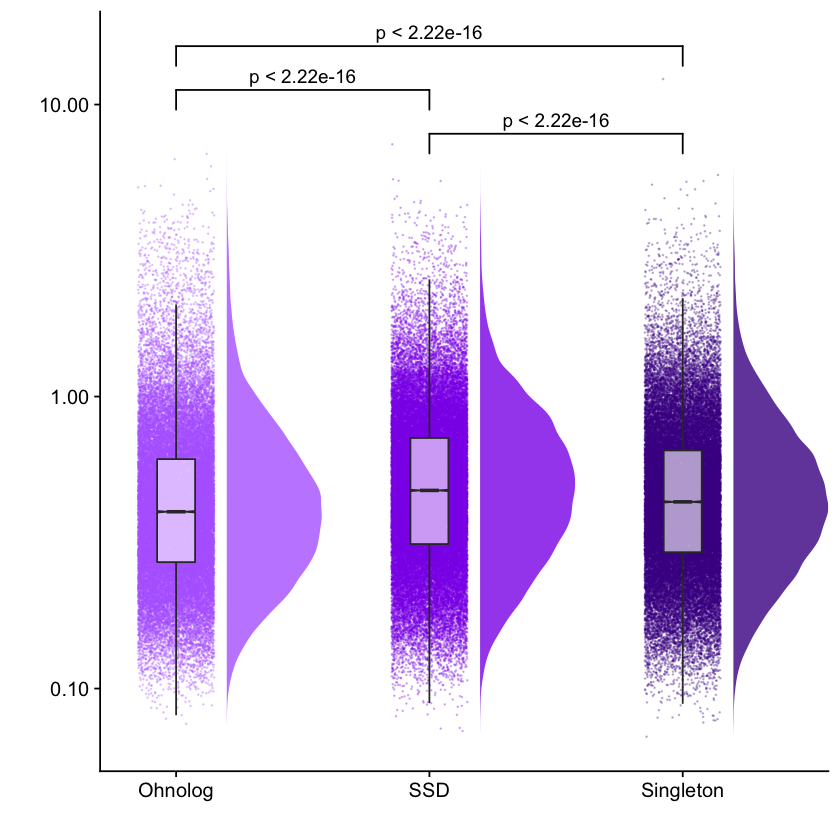

In [21]:
ohno_raincloud_most_sig <- ggplot(effectSizeMostSignificantOhnologs, aes(type2, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = type2), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = type2), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    scale_fill_manual(name="",
        values=c("#b66dff", "#8d2fea","#490092"),
        breaks=c("ohno", "SSD", "singleton"),
        labels=c("Ohnolog", "SSD", "Singleton")) +
    theme(legend.position="none") +
    geom_signif(y_position=c(1.2, 1.05, 0.9), comparisons = list(c("ohno", "singleton"), c("ohno", "SSD"), c("SSD", "singleton")),
               textsize=4, test = "wilcox.test")
ohno_raincloud_most_sig

##### Test difference in effect sizes

Ohnos vs SSDs

In [22]:
w <- wilcox.test(effectSizeMostSignificantOhnologs[ which(effectSizeMostSignificantOhnologs$type == 'ohno'),]$effectSize,
                effectSizeMostSignificantOhnologs[ which(effectSizeMostSignificantOhnologs$type == 'SSD'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeMostSignificantOhnologs[which(effectSizeMostSignificantOhnologs$type == "ohno"), ]$effectSize and effectSizeMostSignificantOhnologs[which(effectSizeMostSignificantOhnologs$type == "SSD"), ]$effectSize
W = 998979676, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [23]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

Ohnos vs Singletons

In [24]:
w <- wilcox.test(effectSizeMostSignificantOhnologs[ which(effectSizeMostSignificantOhnologs$type == 'ohno'),]$effectSize,
                effectSizeMostSignificantOhnologs[ which(effectSizeMostSignificantOhnologs$type == 'singleton'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeMostSignificantOhnologs[which(effectSizeMostSignificantOhnologs$type == "ohno"), ]$effectSize and effectSizeMostSignificantOhnologs[which(effectSizeMostSignificantOhnologs$type == "singleton"), ]$effectSize
W = 1002834449, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [25]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 8.571501e-71

SSDs vs Singletons

In [26]:
w <- wilcox.test(effectSizeMostSignificantOhnologs[ which(effectSizeMostSignificantOhnologs$type == 'SSD'),]$effectSize,
                effectSizeMostSignificantOhnologs[ which(effectSizeMostSignificantOhnologs$type == 'singleton'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeMostSignificantOhnologs[which(effectSizeMostSignificantOhnologs$type == "SSD"), ]$effectSize and effectSizeMostSignificantOhnologs[which(effectSizeMostSignificantOhnologs$type == "singleton"), ]$effectSize
W = 1411594283, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [27]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 2.444825e-100

In [28]:
tapply(effectSizeMostSignificantOhnologs$effectSize, effectSizeMostSignificantOhnologs$type2, summary)

$ohno
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07576 0.27093 0.40322 0.50587 0.61053 6.77595 

$SSD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07158 0.31250 0.47706 0.57017 0.72123 7.31012 

$singleton
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.06841  0.29302  0.43587  0.52701  0.65375 12.22750 


### CNVs (Zarrei et al. CNV map)

#### All eQTLs

In [29]:
effectSizeAllCNVsZarrei <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeAllCNVsZarrei.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  CNV = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [30]:
summary(effectSizeAllCNVsZarrei)

 Ensembl Gene ID        CNV             variant_id            slope         
 Length:13943190    Length:13943190    Length:13943190    Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.38035  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.16124  
                                                          Mean   : 0.03846  
                                                          3rd Qu.: 0.42768  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:13943190    Min.   : 0.05867  
 Class :character   1st Qu.: 0.27559  
 Mode  :character   Median : 0.40282  
                    Mean   : 0.46737  
                    3rd Qu.: 0.59227  
                    Max.   :12.22750  

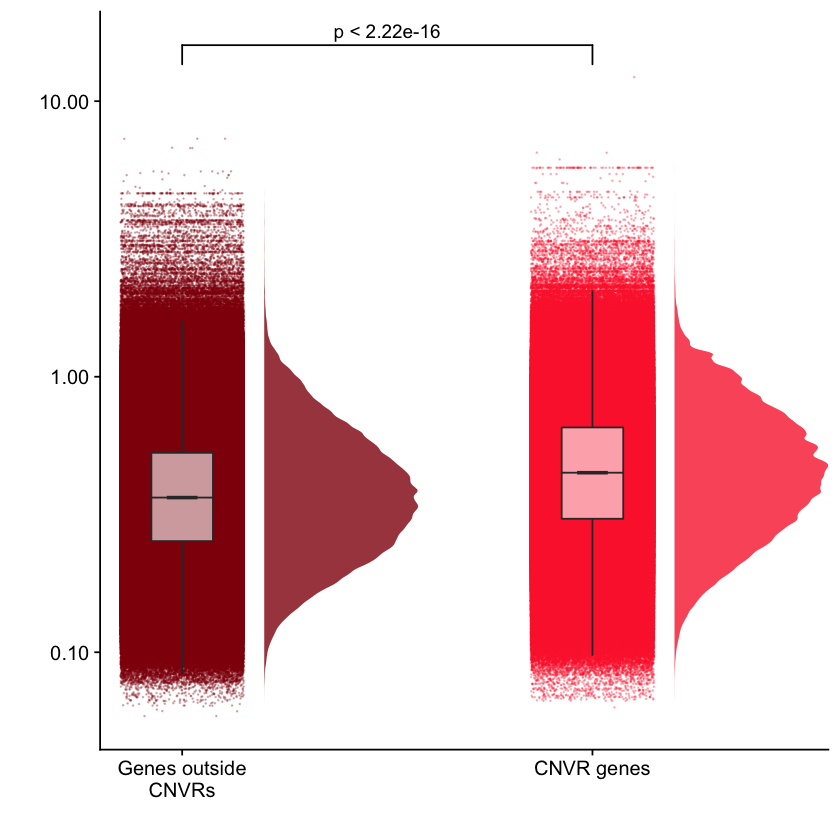

In [31]:
zarrei_raincloud_all <- ggplot(effectSizeAllCNVsZarrei, aes(CNV, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
zarrei_raincloud_all

##### Test difference in effect sizes

In [32]:
w <- wilcox.test(effectSizeAllCNVsZarrei[ which(effectSizeAllCNVsZarrei$CNV == 'Y'),]$effectSize,
                effectSizeAllCNVsZarrei[ which(effectSizeAllCNVsZarrei$CNV == 'N'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeAllCNVsZarrei[which(effectSizeAllCNVsZarrei$CNV == "Y"), ]$effectSize and effectSizeAllCNVsZarrei[which(effectSizeAllCNVsZarrei$CNV == "N"), ]$effectSize
W = 2.924e+13, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [33]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [34]:
tapply(effectSizeAllCNVsZarrei$effectSize, effectSizeAllCNVsZarrei$CNV, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05867 0.25315 0.36424 0.42413 0.52941 7.31012 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0631  0.3052  0.4484  0.5118  0.6545 12.2275 


#### Most significant eQTLs

In [35]:
effectSizeMostSignificantCNVsZarrei <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeMostSignificantCNVsZarrei.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  CNV = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [36]:
summary(effectSizeMostSignificantCNVsZarrei)

 Ensembl Gene ID        CNV             variant_id            slope         
 Length:146224      Length:146224      Length:146224      Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.42016  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.14641  
                                                          Mean   : 0.03973  
                                                          3rd Qu.: 0.46088  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:146224      Min.   : 0.06841  
 Class :character   1st Qu.: 0.29207  
 Mode  :character   Median : 0.43981  
                    Mean   : 0.53641  
                    3rd Qu.: 0.66621  
                    Max.   :12.22750  

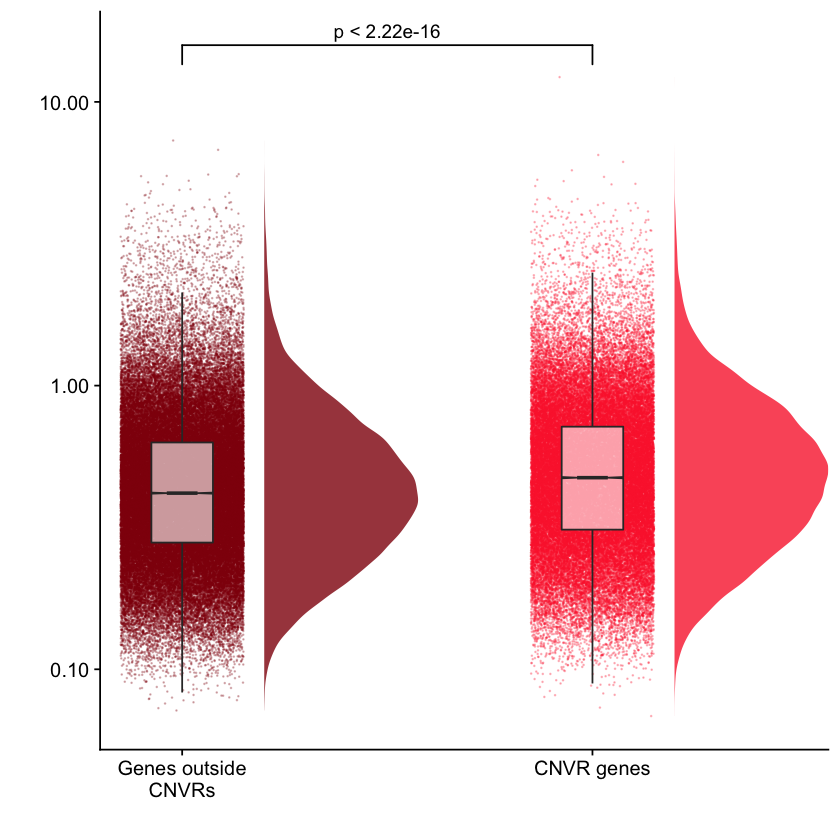

In [37]:
zarrei_raincloud_most_sig <- ggplot(effectSizeMostSignificantCNVsZarrei, aes(CNV, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("Genes outside\nCNVRs", "CNVR genes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
zarrei_raincloud_most_sig

##### Test difference in effect sizes

In [38]:
w <- wilcox.test(effectSizeMostSignificantCNVsZarrei[ which(effectSizeMostSignificantCNVsZarrei$CNV == 'Y'),]$effectSize,
                effectSizeMostSignificantCNVsZarrei[ which(effectSizeMostSignificantCNVsZarrei$CNV == 'N'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeMostSignificantCNVsZarrei[which(effectSizeMostSignificantCNVsZarrei$CNV == "Y"), ]$effectSize and effectSizeMostSignificantCNVsZarrei[which(effectSizeMostSignificantCNVsZarrei$CNV == "N"), ]$effectSize
W = 2901052244, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [39]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 2.898286e-281

In [40]:
tapply(effectSizeMostSignificantCNVsZarrei$effectSize, effectSizeMostSignificantCNVsZarrei$CNV, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07158 0.27971 0.41777 0.51150 0.63028 7.31012 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.06841  0.31071  0.47365  0.56995  0.71648 12.22750 


### CNVs (ExAC CNV data)

#### All eQTLs

In [41]:
effectSizeAllCNVsExAC <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeAllCNVsExAC.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  CNV = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [42]:
summary(effectSizeAllCNVsExAC)

 Ensembl Gene ID        CNV             variant_id            slope         
 Length:10314110    Length:10314110    Length:10314110    Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.35687  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.15515  
                                                          Mean   : 0.03021  
                                                          3rd Qu.: 0.39211  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:10314110    Min.   : 0.05867  
 Class :character   1st Qu.: 0.25915  
 Mode  :character   Median : 0.37446  
                    Mean   : 0.43738  
                    3rd Qu.: 0.54694  
                    Max.   :12.22750  

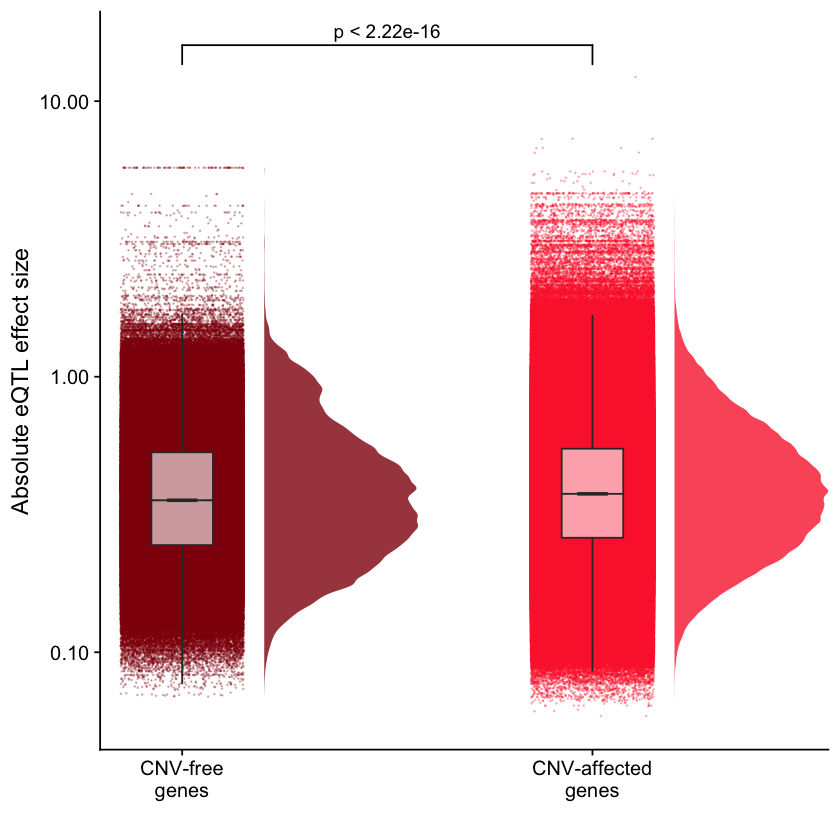

In [43]:
exac_raincloud_all <- ggplot(effectSizeAllCNVsExAC, aes(CNV, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Absolute eQTL effect size", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
exac_raincloud_all

##### Test difference in effect sizes

In [44]:
w <- wilcox.test(effectSizeAllCNVsExAC[ which(effectSizeAllCNVsExAC$CNV == 'Y'),]$effectSize,
                effectSizeAllCNVsExAC[ which(effectSizeAllCNVsExAC$CNV == 'N'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeAllCNVsExAC[which(effectSizeAllCNVsExAC$CNV == "Y"), ]$effectSize and effectSizeAllCNVsExAC[which(effectSizeAllCNVsExAC$CNV == "N"), ]$effectSize
W = 3.7685e+12, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [45]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [46]:
tapply(effectSizeAllCNVsExAC$effectSize, effectSizeAllCNVsExAC$CNV, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06906 0.24491 0.35610 0.42979 0.53178 5.73830 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.05867  0.26033  0.37580  0.43798  0.54798 12.22750 


#### Most significant eQTLs

In [47]:
effectSizeMostSignificantCNVsExAC <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeMostSignificantCNVsExAC.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  CNV = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [48]:
summary(effectSizeMostSignificantCNVsExAC)

 Ensembl Gene ID        CNV             variant_id            slope         
 Length:116736      Length:116736      Length:116736      Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.39682  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.15641  
                                                          Mean   : 0.04661  
                                                          3rd Qu.: 0.44443  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:116736      Min.   : 0.07158  
 Class :character   1st Qu.: 0.28173  
 Mode  :character   Median : 0.42007  
                    Mean   : 0.51464  
                    3rd Qu.: 0.63243  
                    Max.   :12.22750  

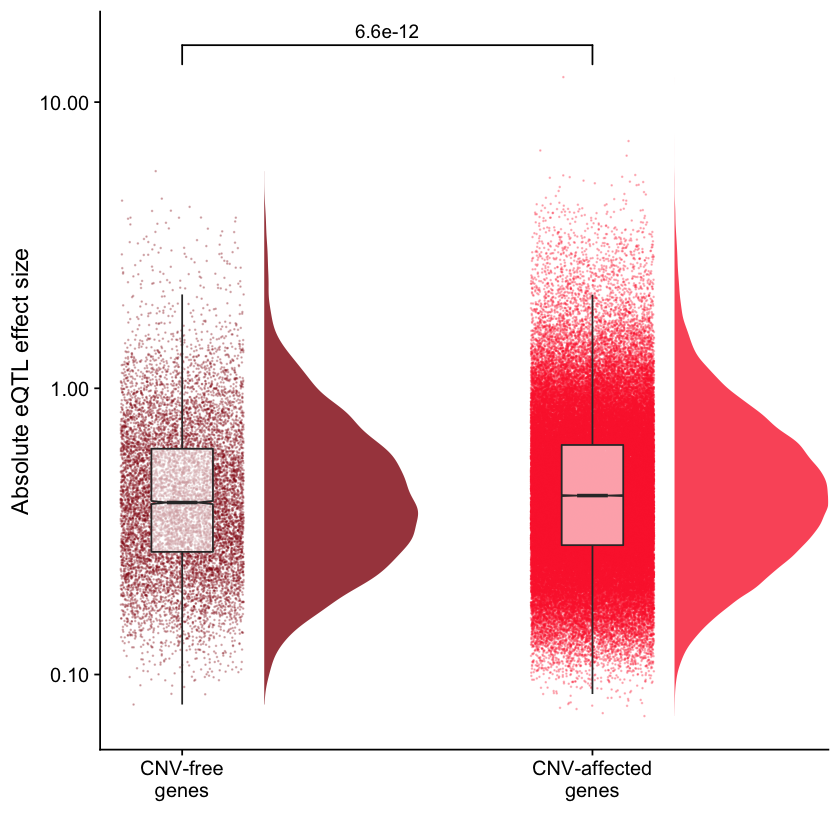

In [49]:
exac_raincloud_most_sig <- ggplot(effectSizeMostSignificantCNVsExAC, aes(CNV, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CNV), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CNV), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="Absolute eQTL effect size", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    scale_fill_manual(name="",
        values=c("#90040B", "#fa2e38"),
        limits=c("N", "Y"),
        labels=c("CNV-free\ngenes", "CNV-affected\ngenes")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
exac_raincloud_most_sig

##### Test difference in effect sizes

In [50]:
w <- wilcox.test(effectSizeMostSignificantCNVsExAC[ which(effectSizeMostSignificantCNVsExAC$CNV == 'Y'),]$effectSize,
                effectSizeMostSignificantCNVsExAC[ which(effectSizeMostSignificantCNVsExAC$CNV == 'N'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeMostSignificantCNVsExAC[which(effectSizeMostSignificantCNVsExAC$CNV == "Y"), ]$effectSize and effectSizeMostSignificantCNVsExAC[which(effectSizeMostSignificantCNVsExAC$CNV == "N"), ]$effectSize
W = 585333296, p-value = 6.594e-12
alternative hypothesis: true location shift is not equal to 0


In [51]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 9.231875e-11

In [52]:
tapply(effectSizeMostSignificantCNVsExAC$effectSize, effectSizeMostSignificantCNVsExAC$CNV, summary)

$N
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07856 0.26826 0.39900 0.50295 0.61495 5.73830 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.07158  0.28313  0.42193  0.51581  0.63394 12.22750 


### Haploinsufficient genes

#### All eQTLs

In [53]:
effectSizeAllHaplo <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeAllHaplo.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  haplo = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [54]:
summary(effectSizeAllHaplo)

 Ensembl Gene ID       haplo            variant_id            slope         
 Length:12695301    Length:12695301    Length:12695301    Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.37983  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.15019  
                                                          Mean   : 0.02759  
                                                          3rd Qu.: 0.41300  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:12695301    Min.   : 0.05867  
 Class :character   1st Qu.: 0.27155  
 Mode  :character   Median : 0.39570  
                    Mean   : 0.45808  
                    3rd Qu.: 0.57998  
                    Max.   :12.22750  

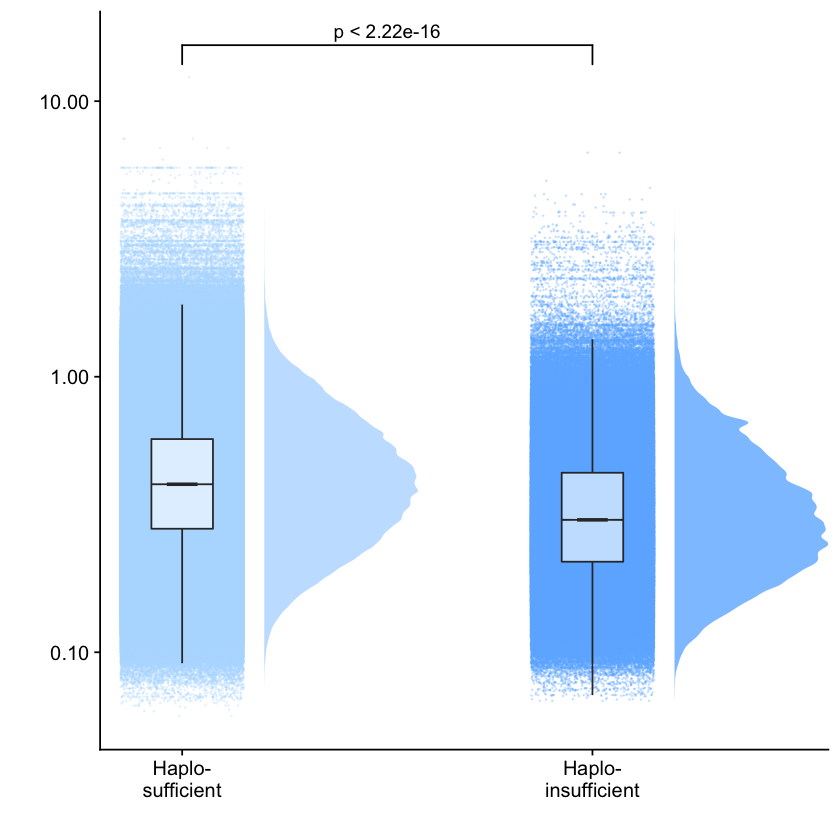

In [55]:
haplo_raincloud_all <- ggplot(effectSizeAllHaplo, aes(haplo, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = haplo), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = haplo), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
haplo_raincloud_all

##### Test difference in effect sizes

In [56]:
w <- wilcox.test(effectSizeAllHaplo[ which(effectSizeAllHaplo$haplo == 'Y'),]$effectSize,
                effectSizeAllHaplo[ which(effectSizeAllHaplo$haplo == 'N'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeAllHaplo[which(effectSizeAllHaplo$haplo == "Y"), ]$effectSize and effectSizeAllHaplo[which(effectSizeAllHaplo$haplo == "N"), ]$effectSize
W = 5.2102e+12, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [57]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [58]:
tapply(effectSizeAllHaplo$effectSize, effectSizeAllHaplo$haplo, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.05867  0.28074  0.40712  0.46925  0.59389 12.22750 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06659 0.21311 0.30238 0.35888 0.44820 6.50876 


#### Most significant eQTLs

In [59]:
effectSizeMostSignificantHaplo <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeMostSignificantHaplo.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  haplo = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [60]:
summary(effectSizeMostSignificantHaplo)

 Ensembl Gene ID       haplo            variant_id            slope         
 Length:134333      Length:134333      Length:134333      Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.41239  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.15160  
                                                          Mean   : 0.04265  
                                                          3rd Qu.: 0.45699  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:134333      Min.   : 0.06841  
 Class :character   1st Qu.: 0.28899  
 Mode  :character   Median : 0.43392  
                    Mean   : 0.53059  
                    3rd Qu.: 0.65583  
                    Max.   :12.22750  

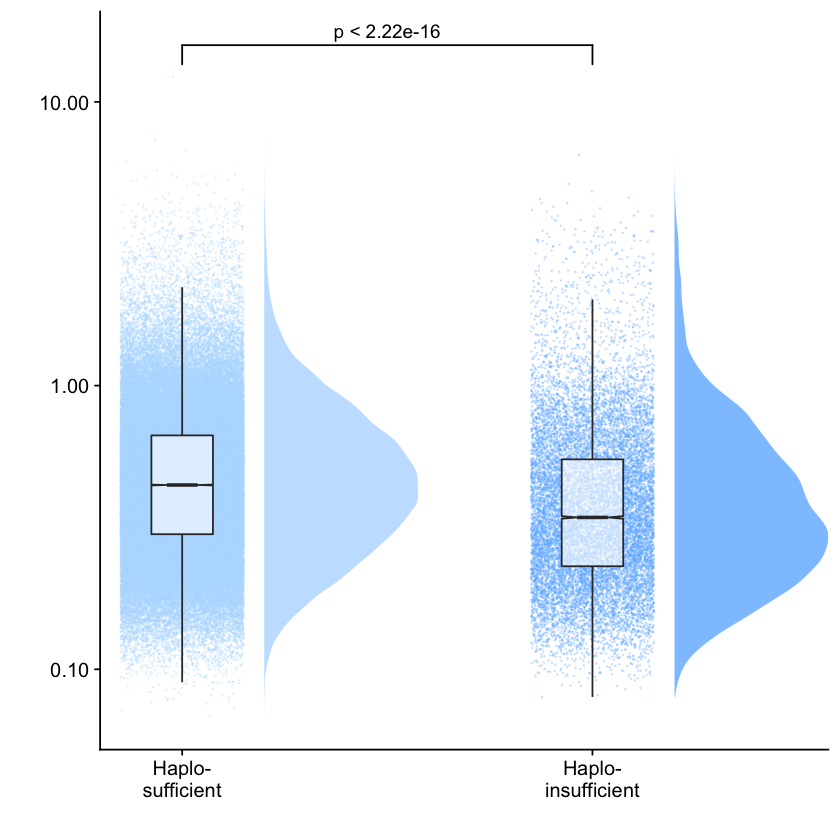

In [61]:
haplo_raincloud_most_sig <- ggplot(effectSizeMostSignificantHaplo, aes(haplo, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = haplo), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = haplo), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    scale_fill_manual(name="",
        values=c("#b6dbff", "#6db6ff"),
        limits=c("N", "Y"),
        labels=c("Haplo-\nsufficient", "Haplo-\ninsufficient")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
haplo_raincloud_most_sig

##### Test difference in effect sizes

In [62]:
w <- wilcox.test(effectSizeMostSignificantHaplo[ which(effectSizeMostSignificantHaplo$haplo == 'Y'),]$effectSize,
                effectSizeMostSignificantHaplo[ which(effectSizeMostSignificantHaplo$haplo == 'N'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeMostSignificantHaplo[which(effectSizeMostSignificantHaplo$haplo == "Y"), ]$effectSize and effectSizeMostSignificantHaplo[which(effectSizeMostSignificantHaplo$haplo == "N"), ]$effectSize
W = 754881822, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [63]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 0

In [64]:
tapply(effectSizeMostSignificantHaplo$effectSize, effectSizeMostSignificantHaplo$haplo, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.06841  0.29934  0.44625  0.54031  0.66749 12.22750 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07991 0.23081 0.34305 0.46005 0.54964 6.49997 


### Copy number conserved genes

#### All eQTLs

In [65]:
effectSizeAllCCN <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeAllCCN.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  CCN = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [66]:
summary(effectSizeAllCCN)

 Ensembl Gene ID        CCN             variant_id            slope         
 Length:13596858    Length:13596858    Length:13596858    Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.37859  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.15815  
                                                          Mean   : 0.03766  
                                                          3rd Qu.: 0.42566  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:13596858    Min.   : 0.05867  
 Class :character   1st Qu.: 0.27360  
 Mode  :character   Median : 0.40079  
                    Mean   : 0.46625  
                    3rd Qu.: 0.59122  
                    Max.   :12.22750  

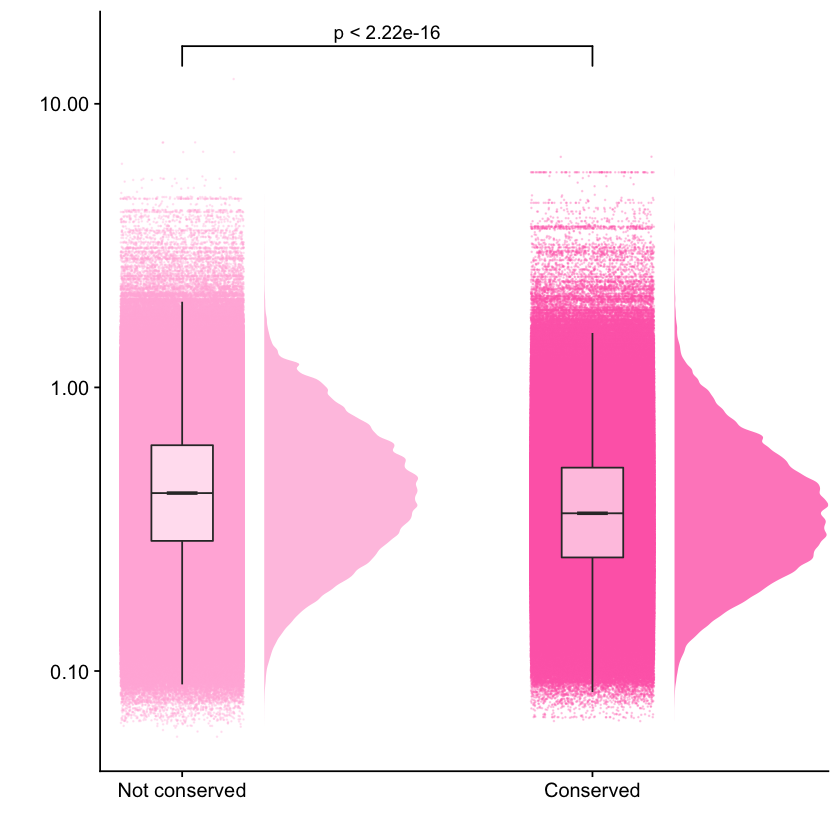

In [67]:
ccn_raincloud_all <- ggplot(effectSizeAllCCN, aes(CCN, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CCN), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CCN), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
ccn_raincloud_all

##### Test difference in effect sizes

In [68]:
w <- wilcox.test(effectSizeAllHaplo[ which(effectSizeAllCCN$CCN == 'Y'),]$effectSize,
                effectSizeAllHaplo[ which(effectSizeAllCCN$CCN == 'N'),]$effectSize) 
w

Warning message:
“The `i` argument of ``[.tbl_df`()` must lie in [0, rows] if positive, as of tibble 3.0.0.
Use `NA_integer_` as row index to obtain a row full of `NA` values.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”



	Wilcoxon rank sum test with continuity correction

data:  effectSizeAllHaplo[which(effectSizeAllCCN$CCN == "Y"), ]$effectSize and effectSizeAllHaplo[which(effectSizeAllCCN$CCN == "N"), ]$effectSize
W = 1.7469e+13, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [69]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 4.904201e-135

In [70]:
tapply(effectSizeAllCCN$effectSize, effectSizeAllCCN$CCN, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.05867  0.28761  0.42401  0.48895  0.62533 12.22750 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06657 0.25145 0.35987 0.42004 0.52128 6.50876 


#### Most significant eQTLs

In [71]:
effectSizeMostSignificantCCN <- read_csv(file="../../outputFiles/eQTLEffectSize/effectSizeMostSignificantCCN.csv.xz")


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Ensembl Gene ID` = col_character(),
  CCN = col_character(),
  variant_id = col_character(),
  slope = col_double(),
  tissue = col_character(),
  effectSize = col_double()
)




In [72]:
summary(effectSizeMostSignificantCCN)

 Ensembl Gene ID        CCN             variant_id            slope         
 Length:142671      Length:142671      Length:142671      Min.   :-6.77595  
 Class :character   Class :character   Class :character   1st Qu.:-0.41644  
 Mode  :character   Mode  :character   Mode  :character   Median : 0.14582  
                                                          Mean   : 0.03875  
                                                          3rd Qu.: 0.45673  
                                                          Max.   :12.22750  
    tissue            effectSize      
 Length:142671      Min.   : 0.06841  
 Class :character   1st Qu.: 0.28954  
 Mode  :character   Median : 0.43571  
                    Mean   : 0.53260  
                    3rd Qu.: 0.66060  
                    Max.   :12.22750  

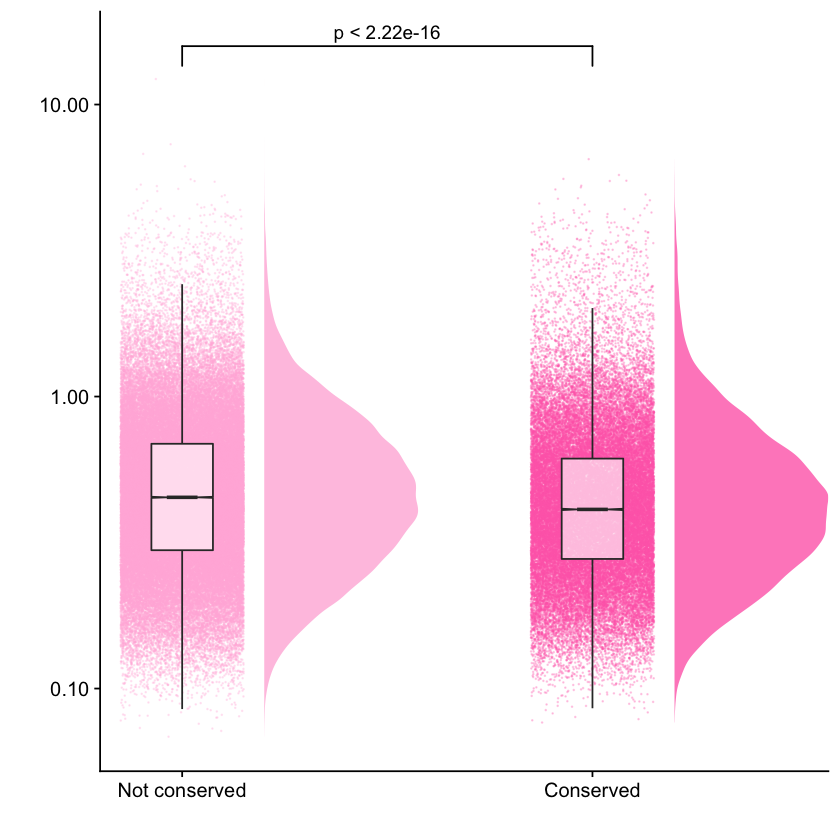

In [73]:
ccn_raincloud_most_sig <- ggplot(effectSizeMostSignificantCCN, aes(CCN, effectSize)) +
    theme_cowplot() +
    geom_flat_violin(aes(fill = CCN), position = position_nudge(x = .2, y = 0), alpha = .8, scale="width", width=0.75, color=NA) +
    geom_point(aes(color = CCN), position = position_jitter(width = .15), size = .075, alpha = 0.25) +
    geom_boxplot(notch=TRUE, width = .15, outlier.shape = NA, alpha = 0.6) +
    scale_y_continuous(name="", expand = expansion(mult = c(0.05, .05)), trans="log10", labels = comma) +
    scale_x_discrete(name="",
        breaks=c("N", "Y"),
        labels=c("Not conserved", "Conserved"),
        expand=c(.1,.1)) +
    scale_color_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    scale_fill_manual(name="",
        values=c("#ffb6db", "#ff6db6"),
        limits=c("N", "Y"),
        labels=c("Not conserved", "Conserved")) +
    theme(legend.position="none") +
    geom_signif(comparisons = list(c("N", "Y")),
               textsize=4, test = "wilcox.test")
ccn_raincloud_most_sig

##### Test difference in effect sizes

In [74]:
w <- wilcox.test(effectSizeMostSignificantCCN[ which(effectSizeMostSignificantCCN$CCN == 'Y'),]$effectSize,
                effectSizeMostSignificantCCN[ which(effectSizeMostSignificantCCN$CCN == 'N'),]$effectSize) 
w


	Wilcoxon rank sum test with continuity correction

data:  effectSizeMostSignificantCCN[which(effectSizeMostSignificantCCN$CCN == "Y"), ]$effectSize and effectSizeMostSignificantCCN[which(effectSizeMostSignificantCCN$CCN == "N"), ]$effectSize
W = 2156282500, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [75]:
p.adjust(w$p.value, method="bonferroni", n=14)

[1] 1.714651e-165

In [76]:
tapply(effectSizeMostSignificantCCN$effectSize, effectSizeMostSignificantCCN$CCN, summary)

$N
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.06841  0.29767  0.45170  0.54946  0.68906 12.22750 

$Y
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0765  0.2779  0.4107  0.5034  0.6131  6.5000 


## Plot figures

In [77]:
p <- (exac_raincloud_all + zarrei_raincloud_all + ohno_raincloud_all + haplo_raincloud_all + ccn_raincloud_all) + plot_layout(ncol = 5, nrow=1)

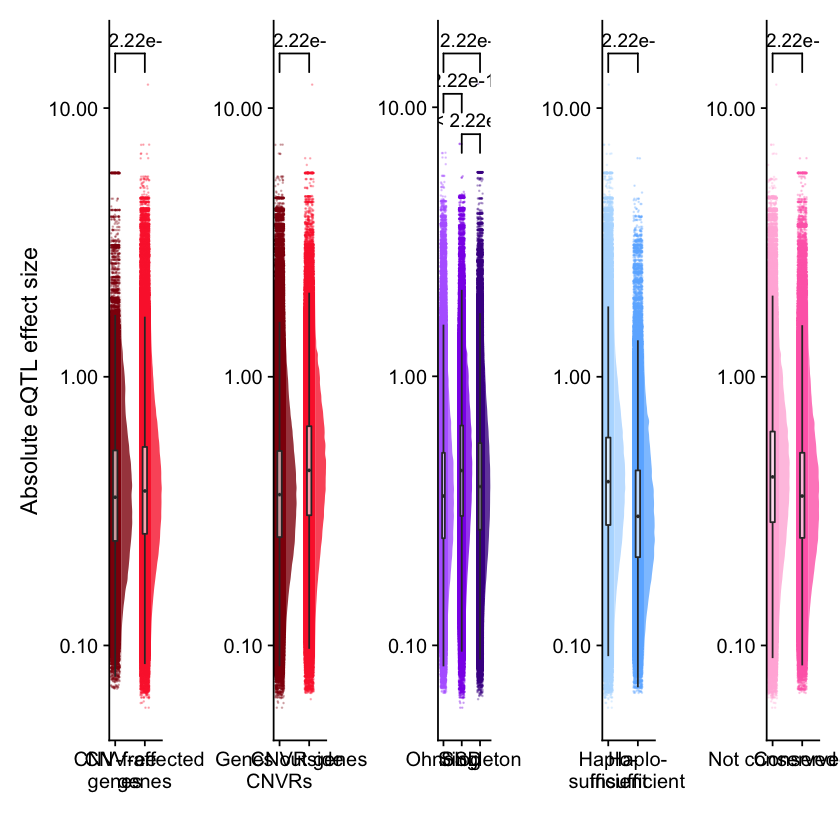

In [78]:
p

In [79]:
ggsave('../../outputFiles/figures/effectSizeAlleQTLs.png', width=40, height=14, units="cm", dpi=300)

In [80]:
p_metasoft <- (exac_raincloud_most_sig + zarrei_raincloud_most_sig + ohno_raincloud_most_sig + haplo_raincloud_most_sig + ccn_raincloud_most_sig) + plot_layout(ncol = 5, nrow=1)

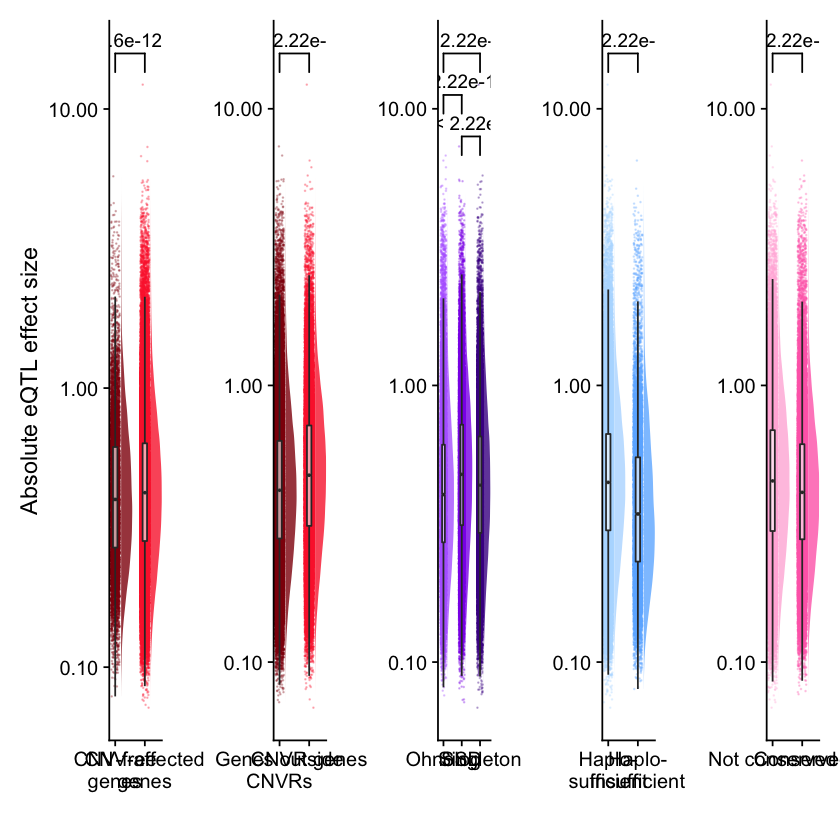

In [81]:
p_metasoft

In [82]:
ggsave('../../outputFiles/figures/effectSizeMostSignificanteQTLs.png', width=40, height=14, units="cm")